## EDA, Preprocessing & Vectorization

### Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

## Product Reviews

In [3]:
product_reviews = pd.read_csv('/content/drive/MyDrive/AuthentiFeel/processed_data/product_reviews.csv')

### EDA

In [ ]:
product_reviews.head()

,unique_id,asin,product_name,product_type,helpful,rating,title,date,reviewer,reviewer_location,review_text,positive_or_not
0,0785758968:one_of_the_best_crichton_novels:jos...,0785758968,Sphere: Books: Michael Crichton,books,0 of 1,5.0,One of the best Crichton novels,"July 1, 2006",Joseph M,"Colorado, USA",Sphere by Michael Crichton is an excellant nov...,1
1,0452279550:the_medicine_of_the_future:wafa_rashed,0452279550,Healing from the Heart: A Leading Surgeon Comb...,books,34 of 41,4.0,The Medicine of the Future,"November 6, 2002",Wafa Rashed,"Jabriya, KUWAIT",Dr. Oz is an accomplished heart surgeon in the...,1
2,"1599620065:beautiful!:sarah_silva_""sar""",1599620065,Mythology: DC Comics Art of Alex Ross 2007 Cal...,books,NaN,5.0,Beautiful!,"June 13, 2006","Sarah Silva ""Sar""","San Diego, CA USA",The most gorgeous artwork in comic books. Cont...,1
3,0743277724:for_lovers_of_robicheaux:g._rousseau,0743277724,Pegasus Descending: A Dave Robicheaux Novel (D...,books,1 of 1,4.0,For lovers of Robicheaux,"November 2, 2006",G. Rousseau,"Finistere, France",This book is for lovers of Robicheaux. His de...,1
4,061318114X:excellent_and_broad_survey_of_the_d...,061318114X,"Guns, Germs, and Steel: The Fates of Human Soc...",books,7 of 9,5.0,Excellent and broad survey of the development ...,"October 6, 2006","Patrick D. Goonan ""www.meaningful-life.us""","Pleasanton, CA",This is going to be a short and sweet review b...,1


In [ ]:
product_reviews.describe()

,rating,positive_or_not
count,8000.000000,8000.000000
mean,3.057250,0.500000
std,1.727598,0.500031
min,1.000000,0.000000
25%,1.000000,0.000000
50%,3.000000,0.500000
75%,5.000000,1.000000
max,5.000000,1.000000


In [ ]:
product_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   unique_id          8000 non-null   object 
 1   asin               8000 non-null   object 
 2   product_name       8000 non-null   object 
 3   product_type       8000 non-null   object 
 4   helpful            6701 non-null   object 
 5   rating             8000 non-null   float64
 6   title              8000 non-null   object 
 7   date               7999 non-null   object 
 8   reviewer           7833 non-null   object 
 9   reviewer_location  6674 non-null   object 
 10  review_text        8000 non-null   object 
 11  positive_or_not    8000 non-null   int64  
dtypes: float64(1), int64(1), object(10)
memory usage: 750.1+ KB


<Axes: >

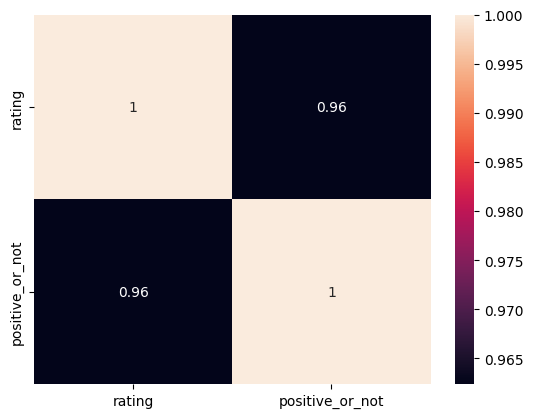

In [ ]:
sns.heatmap(product_reviews[['rating','positive_or_not']].corr(),annot=True)

<Axes: xlabel='rating', ylabel='count'>

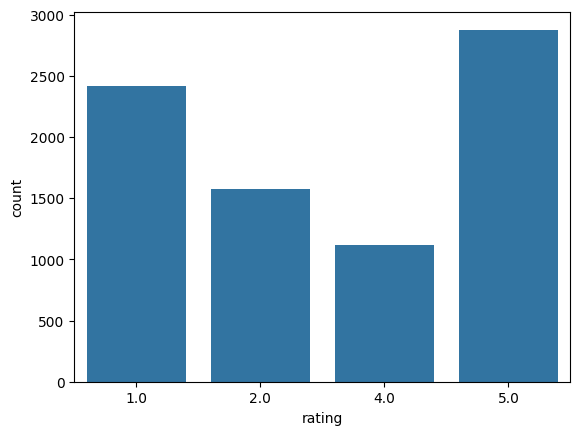

In [ ]:
sns.countplot(x='rating',data=product_reviews)

<Axes: xlabel='product_type', ylabel='count'>

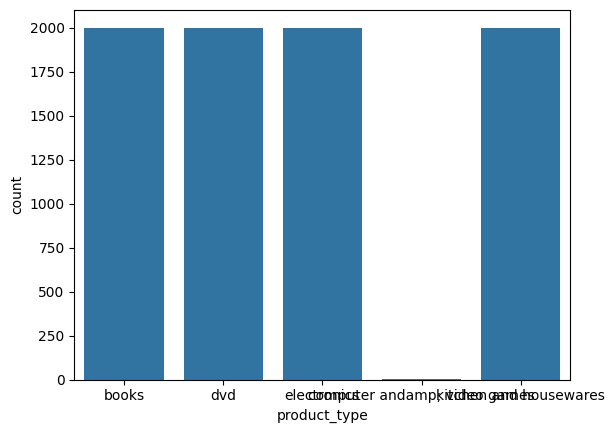

In [ ]:
sns.countplot(x='product_type',data=product_reviews)

<Axes: xlabel='positive_or_not', ylabel='count'>

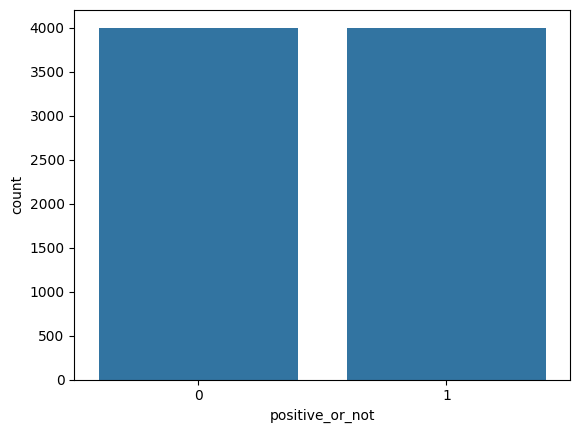

In [ ]:
sns.countplot(x='positive_or_not',data=product_reviews)

In [ ]:
product_reviews['date'] = pd.to_datetime(product_reviews['date'])

In [ ]:
product_reviews['year'] = product_reviews['date'] .dt.year

<Axes: xlabel='year', ylabel='count'>

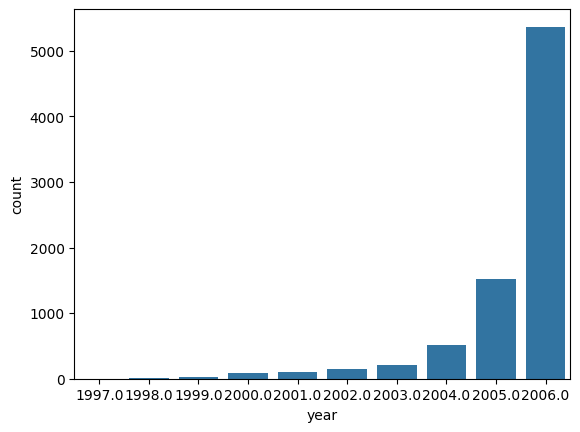

In [ ]:
sns.countplot(x='year',data=product_reviews)

In [ ]:
product_reviews['review_length'] = product_reviews['review_text'].apply(len)

<Axes: xlabel='review_length', ylabel='Count'>

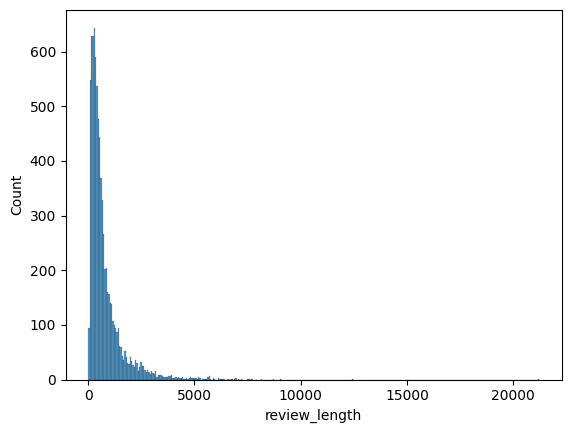

In [ ]:
sns.histplot(product_reviews['review_length'])

In [4]:
all_words = ' '.join(product_reviews['review_text']).split(' ')
most_common_words = Counter(all_words).most_common(20)
most_common_words

[('the', 51992),
 ('and', 29493),
 ('to', 26600),
 ('a', 25990),
 ('', 24273),
 ('of', 23889),
 ('I', 21221),
 ('is', 17793),
 ('in', 13306),
 ('it', 12641),
 ('that', 11555),
 ('this', 11166),
 ('for', 10140),
 ('with', 8125),
 ('was', 7194),
 ('on', 6973),
 ('you', 6865),
 ('have', 6566),
 ('as', 6329),
 ('The', 6087)]

### Preprocessing

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import string
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import random
from sklearn.preprocessing import normalize

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def preprocess_text(doc):
    tokens = nltk.word_tokenize(doc.lower())
    #tokens = [word for word in tokens if word not in stopwords.words('english') and word not in string.punctuation]
    # tokens = [stemmer.stem(word) for word in tokens]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

In [ ]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
data = product_reviews['review_text'].to_list()
target = product_reviews['positive_or_not'].to_list()
preprocessed_data = [preprocess_text(doc) for doc in data]

### Vectorization

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,ngram_range=(1,3),sublinear_tf=True)
tfidf_data = tfidf_vectorizer.fit_transform(preprocessed_data)

In [ ]:
# processed_df = pd.DataFrame(tfidf_data.toarray(),columns = tfidf_vectorizer.get_feature_names_out())

In [ ]:
# processed_df['label'] = target

# Training

In [ ]:
%%capture
# !pip install catboost
# !pip install xgboost

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
# from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [ ]:
seed = 42
X_train, X_test, y_train, y_test=train_test_split(tfidf_data,target,random_state=seed)

## Logistic Regression

In [ ]:
log_reg=LogisticRegression(solver='newton-cg', max_iter=200, C=10)
log_reg.fit(tfidf_data, target)
# log_reg.score(X_test, y_test)

LogisticRegression(C=10, max_iter=200, solver='newton-cg')

## Multinomial NB

In [ ]:
mnb=MultinomialNB()
mnb.fit(tfidf_data, target)
# mnb.score(X_test, y_test)

MultinomialNB()

In [ ]:
# nb = MultinomialNB(alpha=1,fit_prior=True)
# nb.fit(X_train,y_train)

In [ ]:
# nb_preds = nb.predict(X_test)
# f1_score(y_test,nb_preds)

## SVC

In [ ]:
param_grid_linear = {
    'penalty': ['l1', 'l2'],
    'loss': ['hinge', 'squared_hinge'],
    'C': [0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 200,500]
}

param_grid_rbf = {
    'kernel': ['rbf'],
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1, 10, 100]
}

search_linearsvc = RandomizedSearchCV(LinearSVC(dual=False), param_grid_linear,n_iter=75, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
search_rbfsvc = RandomizedSearchCV(SVC(), param_grid_rbf, n_iter=75, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

### Linear

In [ ]:
svc=LinearSVC(C=20)
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.8645

In [ ]:
search_linearsvc.best_params_

In [ ]:
search_linearsvc.best_score_

### RBF

In [ ]:
search_rbfsvc.fit(tfidf_data, target)

In [ ]:
search_rbfsvc.best_params_

In [ ]:
search_rbfsvc.best_score_

## Ensemble

In [ ]:
log_reg=LogisticRegression()
nb=MultinomialNB()
svc=LinearSVC(C=20)
et=ExtraTreesClassifier(n_estimators=200)

ensemble= VotingClassifier(estimators=[('linearsvc',svc), ('multinb',nb), ('log',log_reg),])
#ensemble.fit(X_train, y_train)

In [ ]:
y_train_pred=ensemble.predict(X_train)
y_test_pred=ensemble.predict(X_test)
ensemble.score(X_test, y_test)

0.8705

Text(0, 0.5, 'True Class')

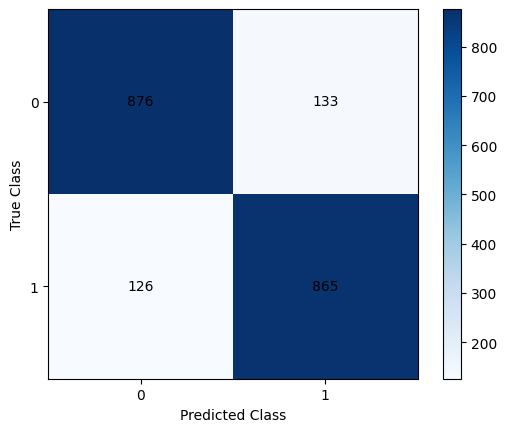

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, classification_report
cm=confusion_matrix(y_test, y_test_pred)
n=len(cm)
plt.imshow(cm,cmap='Blues',extent=[-0.5,n-0.5,-0.5,n-0.5])
for i in range(n):
  for j in range(n):
    plt.text(i,j,cm[n-j-1,i],ha='center',va='center')
plt.colorbar()
plt.xticks(range(n))
plt.yticks(range(n),range(n-1,-1,-1))
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

In [ ]:
precision_score(y_test, y_test_pred)

0.8667334669338678

In [ ]:
report=classification_report(y_test, y_test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1009
           1       0.87      0.87      0.87       991

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000



# Pipeline

## Training and Evaluation

### Training

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer

# Make sure you have the necessary NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

class TextPreprocessor:
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        processed = []
        for doc in X:
            doc = doc.lower()
            tokens = nltk.word_tokenize(doc)
            # Uncomment the following line if you decide to include stopword and punctuation removal
            # tokens = [word for word in tokens if word not in stopwords.words('english') and word not in string.punctuation]
            tokens = [self.lemmatizer.lemmatize(word) for word in tokens]
            processed.append(' '.join(tokens))
        return processed


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:


# Initialize the pipeline with your custom preprocessor, a vectorizer, and a classifier
pipeline = Pipeline([
    ('text_preprocess', TextPreprocessor()),
    ('vectorizer', TfidfVectorizer(max_df=0.95, min_df=2,ngram_range=(1,3),sublinear_tf=True)),
    ('classifier', ensemble)
])

In [ ]:
seed = 42
pipeline.fit(data, target)

Pipeline(steps=[('text_preprocess',
                 <__main__.TextPreprocessor object at 0x7e40de5833a0>),
                ('vectorizer',
                 TfidfVectorizer(max_df=0.95, min_df=2, ngram_range=(1, 3),
                                 sublinear_tf=True)),
                ('classifier',
                 VotingClassifier(estimators=[('linearsvc', LinearSVC(C=20)),
                                              ('multinb', MultinomialNB()),
                                              ('log', LogisticRegression())]))])

In [ ]:
import pickle
with open('/content/drive/MyDrive/AuthentiFeel/models/ProductReviewsModel.pkl', 'wb') as file:
    pickle.dump(pipeline, file)
#dump(pipeline, '/content/drive/MyDrive/AuthentiFeel/models/ProductReviewsModel.joblib')

In [ ]:
pipeline.score(X_test, y_test)

### Evaluation

In [ ]:
# Model report?
# Confusion matrix
# Etc

### Word cloud

In [ ]:
feature_names = tfidf_vectorizer.get_feature_names_out()

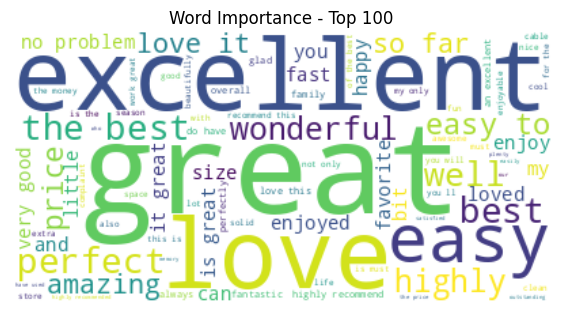

In [ ]:
top_coeff = np.argsort((log_reg.coef_[0]))[::-1][:100]
word_freq = {feature_names[idx]:log_reg.coef_[0][idx] for idx in top_coeff}

wordcloud_log_reg = WordCloud(background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(7, 5))
plt.imshow(wordcloud_log_reg, interpolation='bilinear')
plt.axis('off')
plt.title('Word Importance - Top 100')
plt.show()

In [ ]:
log_reg.coef_[0]

array([-0.00166961, -0.34249882,  0.0333745 , ...,  0.58622892,
        0.58622892, -0.09253027])

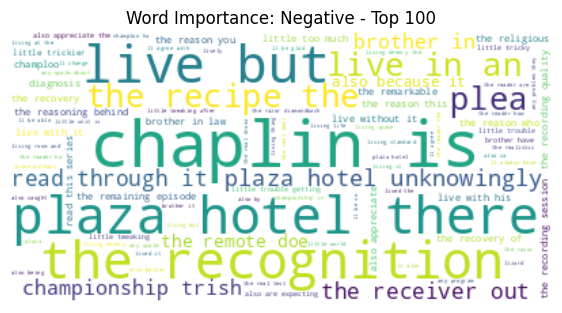

In [ ]:
top_coeff = np.argsort(np.abs(mnb.feature_log_prob_[0].squeeze()))[::-1][:100]
word_freq = {feature_names[idx]:mnb.feature_log_prob_[0][idx] for idx in top_coeff}

wordcloud_log_reg = WordCloud(background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(7, 5))
plt.imshow(wordcloud_log_reg, interpolation='bilinear')
plt.axis('off')
plt.title('Word Importance: Negative - Top 100')
plt.show()

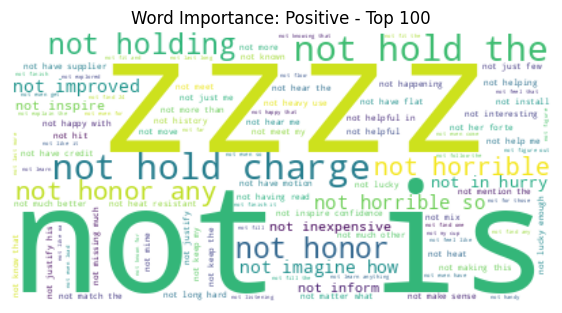

In [ ]:
top_coeff = np.argsort(np.abs(mnb.feature_log_prob_[1].squeeze()))[::-1][:100]
word_freq = {feature_names[idx]:mnb.feature_log_prob_[1][idx] for idx in top_coeff}

wordcloud_log_reg = WordCloud(background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(7, 5))
plt.imshow(wordcloud_log_reg, interpolation='bilinear')
plt.axis('off')
plt.title('Word Importance: Positive - Top 100')
plt.show()

## Final Model

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer

# Make sure you have the necessary NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

class TextPreprocessor:
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        processed = []
        for doc in X:
            doc = doc.lower()
            tokens = nltk.word_tokenize(doc)
            # Uncomment the following line if you decide to include stopword and punctuation removal
            # tokens = [word for word in tokens if word not in stopwords.words('english') and word not in string.punctuation]
            tokens = [self.lemmatizer.lemmatize(word) for word in tokens]
            processed.append(' '.join(tokens))
        return processed


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:


# Initialize the pipeline with your custom preprocessor, a vectorizer, and a classifier
pipeline = Pipeline([
    ('text_preprocess', TextPreprocessor()),
    ('vectorizer', TfidfVectorizer(max_df=0.95, min_df=2,ngram_range=(1,3),sublinear_tf=True)),
    ('classifier', ensemble)
])

In [ ]:
seed = 42
pipeline.fit(data, target)

Pipeline(steps=[('text_preprocess',
                 <__main__.TextPreprocessor object at 0x7a133f6db670>),
                ('vectorizer',
                 TfidfVectorizer(max_df=0.95, min_df=2, ngram_range=(1, 3),
                                 sublinear_tf=True)),
                ('classifier',
                 VotingClassifier(estimators=[('linearsvc', LinearSVC(C=20)),
                                              ('multinb', MultinomialNB()),
                                              ('log', LogisticRegression())]))])

In [ ]:
import pickle
with open('/content/drive/MyDrive/AuthentiFeel/models/ProductReviewsModel.pkl', 'wb') as file:
    pickle.dump(pipeline, file)
#dump(pipeline, '/content/drive/MyDrive/AuthentiFeel/models/ProductReviewsModel.joblib')

In [ ]:
pipeline.score(X_test, y_test)

# Inferencing

In [ ]:
from joblib import load
model=load("/content/drive/MyDrive/AuthentiFeel/models/ProductReviewsModel.joblib")

In [ ]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

In [ ]:
model.predict(["Amazing phone!"])

In [ ]:
import pickle
with open('/content/drive/MyDrive/AuthentiFeel/models/ProductReviewsModel.pkl', 'rb') as file:
    loaded_model_pipeline = pickle.load(file)

In [ ]:
loaded_model_pipeline.predict(["Terrible Purchase. Do not Recommend!"])

array([0])